In [1]:
#Importing all the libraries and modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [26]:
weather_df=pd.read_csv(r'C:\Users\Mayank\Desktop\Mayank\AI Weather and Pollution Prediction Project\Main Datasets\Weather Station\Temperature.csv')

In [27]:
print(weather_df.shape)
print(weather_df.describe())
print(weather_df.head())
print(weather_df.columns)

(100990, 8)
                Date          Month           Hour     heatindex  \
count  100990.000000  100990.000000  100990.000000  29155.000000   
mean       15.690049       6.579344      10.928844     35.651710   
std         8.769718       3.475841       6.854328      5.015384   
min         1.000000       1.000000       0.000000     26.800000   
25%         8.000000       4.000000       5.000000     31.700000   
50%        16.000000       7.000000      11.000000     35.100000   
75%        23.000000      10.000000      17.000000     39.200000   
max        31.000000      12.000000      23.000000     73.600000   

            humidity           rain           temp  
count  100233.000000  100990.000000  100317.000000  
mean       57.909481       0.026260      25.451269  
std        23.807771       0.159908       8.482859  
min         4.000000       0.000000       1.000000  
25%        39.000000       0.000000      19.000000  
50%        59.000000       0.000000      27.000000  
75% 

In [28]:
#Preprocessing the data
print(weather_df.isnull().any())
weather_df["heatindex"].fillna(35.651710, inplace = True)
weather_df["humidity"].fillna(57.909481, inplace = True)
weather_df["temp"].fillna(25.451269, inplace = True)
print(weather_df.isnull().any())
#All these mean values are obtained after describing the data set

Date         False
Month        False
Hour         False
Time         False
heatindex     True
humidity      True
rain         False
temp          True
dtype: bool
Date         False
Month        False
Hour         False
Time         False
heatindex    False
humidity     False
rain         False
temp         False
dtype: bool


In [29]:
print(weather_df.head())
print(weather_df.describe())

   Date  Month  Hour   Time  heatindex  humidity  rain  temp
0     1     11    11  11:00   35.65171      27.0     0  30.0
1     1     11    12  12:00   35.65171      32.0     0  28.0
2     1     11    13  13:00   35.65171      44.0     0  24.0
3     1     11    14  14:00   35.65171      41.0     0  24.0
4     1     11    16  16:00   35.65171      47.0     0  23.0
                Date          Month           Hour      heatindex  \
count  100990.000000  100990.000000  100990.000000  100990.000000   
mean       15.690049       6.579344      10.928844      35.651710   
std         8.769718       3.475841       6.854328       2.694736   
min         1.000000       1.000000       0.000000      26.800000   
25%         8.000000       4.000000       5.000000      35.651710   
50%        16.000000       7.000000      11.000000      35.651710   
75%        23.000000      10.000000      17.000000      35.651710   
max        31.000000      12.000000      23.000000      73.600000   

            

In [30]:
weather_df_num=weather_df[list(weather_df.dtypes[weather_df.dtypes!='object'].index)]
weather_y=weather_df_num.pop('temp')
weather_x=weather_df_num

In [31]:
train_x,test_x,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)
train_x.head()

,Date,Month,Hour,heatindex,humidity,rain
99686,6,1,15,35.65171,96.0,0
18305,29,1,10,35.65171,35.0,0
91877,20,8,6,35.65171,57.0,0
55714,29,2,14,35.65171,47.0,0
40664,2,2,7,35.65171,82.0,0


In [32]:
#First Model Linear Regression
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print(test_x)
prediction=model.predict(test_x)
#Calculating error
np.mean((prediction-test_y)**2)

       Date  Month  Hour  heatindex  humidity  rain
16733    18     11     8   35.65171      21.0     0
82934    21      4    15   35.65171      27.0     0
33831    11      4    13   35.65171      13.0     0
22660    14     12    19   35.65171      77.0     0
47063    16      8    14   33.60000      89.0     0
...     ...    ...   ...        ...       ...   ...
26343    24      5     8   44.40000      21.0     0
10264    12      9    22   35.65171      94.0     0
17753     4      1    15   35.65171      88.0     0
98956     2     12    12   35.65171      73.0     0
46164    26      7    23   34.50000      79.0     0

[20198 rows x 6 columns]


43.11190069511709

In [36]:
l=[28,6,1,10,0,0]
x=np.array(l).reshape(1,-1)
print(x.shape)
prediction=model.predict(test_x)
print(prediction,model.predict(x))

(1, 6)
[34.68120649 31.35361    34.30045076 ... 16.95414627 23.49238818
 20.40521861] [24.52415995]


In [37]:
pd.DataFrame({'actual':test_y,'prediction':prediction,'diff':(test_y-prediction)})

,actual,prediction,diff
16733,28.0,34.681206,-6.681206
82934,30.0,31.353610,-1.353610
33831,35.0,34.300451,0.699549
22660,14.0,22.791412,-8.791412
47063,28.0,17.883356,10.116644
...,...,...,...
26343,43.0,37.468724,5.531276
10264,25.0,18.179567,6.820433
17753,11.0,16.954146,-5.954146
98956,22.0,23.492388,-1.492388


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model, 'TEMPLR.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#LR = joblib.load('LRTP.pkl')  
  
# Use the loaded model to make predictions 
#LR.predict(X_test)

['TEMPLR.pkl']

In [22]:
test_x

,dewpt,fog,hail,heatindex,humidity,pressure,rain,thunder,tornado,vis,wdegree,wgust,windchill,wspd
16733,4.0,0,0,35.65171,21.0,1017.0,0,0,0,5.000000,280.0,37.671175,5.713817,14.800000
82934,14.0,0,0,35.65171,27.0,1007.0,0,0,0,2.000000,270.0,37.671175,5.713817,3.700000
33831,3.0,0,0,35.65171,13.0,1006.0,0,0,0,4.500000,340.0,37.671175,5.713817,11.100000
22660,10.0,1,0,35.65171,77.0,1015.0,0,0,0,0.700000,0.0,37.671175,5.713817,0.000000
47063,26.0,0,0,33.60000,89.0,1002.0,0,0,0,2.500000,20.0,37.671175,5.713817,3.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26343,16.0,0,0,44.40000,21.0,996.0,0,0,0,4.000000,280.0,37.671175,5.713817,22.200000
10264,24.0,0,0,35.65171,94.0,1005.0,0,0,0,2.402774,0.0,37.671175,5.713817,7.678463
17753,9.0,1,0,35.65171,88.0,1016.0,0,0,0,0.200000,120.0,37.671175,5.713817,5.600000
98956,17.0,0,0,35.65171,73.0,1017.0,0,0,0,1.000000,0.0,37.671175,5.713817,0.000000


In [14]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly=PolynomialFeatures(degree=4)

In [16]:
x_poly=poly.fit_transform(train_x)

In [18]:
lin2=LinearRegression()

In [21]:
poly.fit(x_poly,train_y)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Mayank\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-0bbf78d8781c>", line 1, in <module>
    poly.fit(x_poly,train_y)
  File "C:\Users\Mayank\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py", line 1470, in fit
    self.n_output_features_ = sum(1 for _ in combinations)
  File "C:\Users\Mayank\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py", line 1470, in <genexpr>
    self.n_output_features_ = sum(1 for _ in combinations)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Mayank\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the ab

KeyboardInterrupt: 

In [ ]:
lin2.fit(x_poly,train_y)

In [ ]:
prediction2 = lin2.predict(poly.fit_transform(test_x))
#Calculating the error
np.mean((prediction2-test_y)**2)

In [ ]:
pd.DataFrame({'actual':test_y,'prediction':prediction2,'diff':(test_y-prediction2)})

In [ ]:
#Saving the Polynomial Regression Model
joblib.dump(lin2, 'PRTP.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#PR = joblib.load('PRTP.pkl')  
  
# Use the loaded model to make predictions 
#PR.predict(X_test)

In [38]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [40]:
prediction3=regressor.predict(test_x)
print(np.mean((prediction3-test_y)**2))
dt=np.array([28,6,1,51,100,0]).reshape(1,-1)
print(regressor.predict(dt))

5.01347606582049
[36.]


In [41]:
pd.DataFrame({'actual':test_y,'prediction':prediction3,'diff':(test_y-prediction3)})

,actual,prediction,diff
16733,28.0,28.0,0.0
82934,30.0,32.0,-2.0
33831,35.0,35.0,0.0
22660,14.0,18.0,-4.0
47063,28.0,28.0,0.0
...,...,...,...
26343,43.0,43.0,0.0
10264,25.0,26.0,-1.0
17753,11.0,12.0,-1.0
98956,22.0,22.0,0.0


In [33]:
#Saving the Decision Tree
joblib.dump(regressor, 'DTTP.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#DT = joblib.load('PRTP.pkl')  
  
# Use the loaded model to make predictions 
#DT.predict(X_test)

['DTTP.pkl']

In [42]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=60,random_state=0,n_estimators=100)
regr.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [43]:
prediction4=regr.predict(test_x)
np.mean((prediction4-test_y)**2)

3.126675372361891

In [44]:
regr.predict(dt)

array([32.77])

In [45]:
pd.DataFrame({'actual':test_y,'prediction':prediction4,'diff':(test_y-prediction4)})

,actual,prediction,diff
16733,28.0,27.503333,0.496667
82934,30.0,30.330000,-0.330000
33831,35.0,36.082000,-1.082000
22660,14.0,16.735000,-2.735000
47063,28.0,28.000000,0.000000
...,...,...,...
26343,43.0,43.010000,-0.010000
10264,25.0,25.908333,-0.908333
17753,11.0,11.868833,-0.868833
98956,22.0,21.520000,0.480000


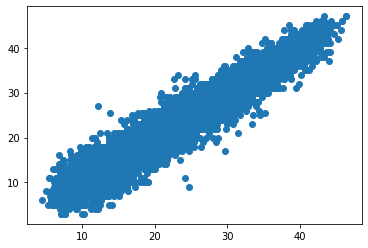

In [46]:
plt.scatter(prediction4,test_y)

In [21]:
from datetime import datetime
datetime.today()
date=datetime.now()


In [58]:
D=date.day
H=date.hour
M=date.month
print(D,H,M)

28 1 6


In [69]:
#For hourly, aily, weekly and min max temp details
L=[]
import random
D=date.day
H=date.hour
M=date.month
for d in range(1,15):
    for h in range(1,25):
        para=np.array([D,M,H,54+(h/2)-(d/4),59+(h/3)-(d/6),0+random.random()]).reshape(1,-1)
        p=model.predict(para)
        print(p,H,D,M)
        H+=1
        if H==24:
            H=0
            h=24
    D+=1
    if D==30:
        M+=1
        D=1
        


[37.49422039] 1 28 6
[37.20691064] 2 28 6
[36.81357921] 3 28 6
[39.66933911] 4 28 6
[37.73720787] 5 28 6
[37.33093435] 6 28 6
[38.25530458] 7 28 6
[37.71189807] 8 28 6
[36.61588134] 9 28 6
[38.651001] 10 28 6
[39.78570034] 11 28 6
[40.01671601] 12 28 6
[37.37697885] 13 28 6
[38.03797634] 14 28 6
[39.51258204] 15 28 6
[41.65772403] 16 28 6
[42.59752504] 17 28 6
[40.97897497] 18 28 6
[38.41515191] 19 28 6
[41.79462284] 20 28 6
[41.74686545] 21 28 6
[40.26330547] 22 28 6
[39.40737903] 23 28 6
[43.39633041] 0 28 6
[35.67341256] 1 29 6
[39.37839823] 2 29 6
[35.64817569] 3 29 6
[36.64310695] 4 29 6
[36.1884823] 5 29 6
[36.41733869] 6 29 6
[39.17628271] 7 29 6
[40.38098265] 8 29 6
[39.46718862] 9 29 6
[38.27191849] 10 29 6
[38.84716942] 11 29 6
[41.38650546] 12 29 6
[39.59871914] 13 29 6
[42.04637186] 14 29 6
[41.94749124] 15 29 6
[42.69892904] 16 29 6
[42.38235637] 17 29 6
[43.13008571] 18 29 6
[40.34667786] 19 29 6
[41.38839488] 20 29 6
[39.15055503] 21 29 6
[42.68903278] 22 29 6
[39.416325